Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import accuracy_score

Numpy will be used to make arrays in python.
Panda is imported here to create the structured table, because we have file in csv format.
Since we are importing only a specific function thats why "from_import" is used
We have split our data into training & test data that's why train_test_split function is called.


Data Collection & Processing Part

In [2]:
#loading the csv data to a Pandas Dataframe
breast_data = pd.read_csv('/content/breast_data.csv') #it will read out data & store the data in dataframe

In [3]:
#head function will show first 5 rows of dataset
breast_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,8510426,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [4]:
# tail function will show last 5 rows of dataset
breast_data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
564,926125,1,20.92,25.09,143.0,1347.0,0.10990,0.2236,0.31740,0.14740,...,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
565,926424,1,21.56,22.39,142.0,1479.0,0.11100,0.1159,0.24390,0.13890,...,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
566,926682,1,20.13,28.25,131.2,1261.0,0.09780,0.1034,0.14400,0.09791,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
567,926954,1,16.60,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,...,18.98,34.12,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820
568,927241,1,20.60,29.33,140.1,1265.0,0.11780,0.2770,0.35140,0.15200,...,25.74,39.42,184.6,1821.0,0.1650,0.8681,0.9387,0.2650,0.4087,0.12400


In [5]:
#To see no. of rows & Colums in our dataset (rows,columns)
breast_data.shape

(569, 32)

In [6]:
#For getting some info about the data
breast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
#Checking for missing values (In case of missing value use imputation method)
breast_data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
# Statistical measures about the data
breast_data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
# Checking the distribution of Target Variable
breast_data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

0 : Represent - Tumour is Benign

1 : Represent - Tumour is Malignant

 **Splitting the Features and Target**

When we are dropping a column in data, we give axis = 1

When we are dropping a row in data, we give axis = 0


In [10]:
X = breast_data.drop(columns=['diagnosis','id'],axis=1) # Here I have loaded the data (With all columns except target coulumn)
Y = breast_data['diagnosis'] # Storing target column in Y variable

In [11]:
# Checking target column is dropped or not
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0         13.540         14.36           87.46      566.3          0.09779   
1         13.080         15.71           85.63      520.0          0.10750   
2          9.504         12.44           60.34      273.9          0.10240   
3         13.030         18.42           82.61      523.8          0.08983   
4          8.196         16.84           51.71      201.9          0.08600   
..           ...           ...             ...        ...              ...   
564       20.920         25.09          143.00     1347.0          0.10990   
565       21.560         22.39          142.00     1479.0          0.11100   
566       20.130         28.25          131.20     1261.0          0.09780   
567       16.600         28.08          108.30      858.1          0.08455   
568       20.600         29.33          140.10     1265.0          0.11780   

     compactness_mean  concavity_mean  concave_points_mean  sym

In [12]:
# Print the target column
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    1
565    1
566    1
567    1
568    1
Name: diagnosis, Length: 569, dtype: int64


Now Splitting the data into Training data & Test Data

X_train : Contains features of all the training data

Y_train : Contains target of all the features present in X_train

X_test : Contains features of all the test data

Y_test : Contains traget of all the features present in X_test


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [14]:
# Here 80% data go into training & 20% data go for test
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(569, 30) (455, 30) (114, 30)
(569,) (455,) (114,)


**Model 1 : Logistic Regression**

In [15]:
# we are going to load one instance of Logistic Regresion Model into variable 'model_1', which I had imported from sklearn
model_1 = LogisticRegression()
# We are going to train out Logistic Regression model with Training Data
# Fit function will try to find the pattern & relationship between the features and the corresponding target. And once we train our model we can predict for new values
model_1.fit(X_train, Y_train)

# Accuracy on Training data
X_train_prediction = model_1.predict(X_train)
training_data_accuracy_lr = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data : ', training_data_accuracy_lr)
# Accuracy on Test data
X_train_prediction = model_1.predict(X_test)
test_data_accuracy_lr = accuracy_score(X_train_prediction, Y_test)
print('Accuracy on Test Data : ', test_data_accuracy_lr)

input_data = (18.46,18.52,121.1,1075,0.09874,0.1053,0.1335,0.08795,0.2132,0.06022,0.6997,1.475,4.782,80.6,0.006471,0.01649,0.02806,0.0142,0.0237,0.003755,22.93,27.68,152.2,1603,0.1398,0.2089,0.3157,0.1642,0.3695,0.08579)
# Currently it is a tuple, and we have to convert it into numpy array
# asarray function will convet tuple datatype into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_1.predict(input_data_reshaped)
print(prediction) # It will print in list form

if(prediction[0]==0):
  print('Tumor is Benign')
else:
  print('Tumor is Malignant')

Accuracy on Training Data :  0.9604395604395605
Accuracy on Test Data :  0.9385964912280702
[1]
Tumor is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Model 2 : Support Vector Machine

In [16]:
# we are going to load one instance of Support Vector Machine Model into variable 'model_2', which I had imported from sklearn
model_2 = svm.SVC(kernel='linear')
# We are going to train out Support Vector Machine model with Training Data
# Fit function will try to find the pattern & relationship between the features and the corresponding target. And once we train our model we can predict for new values
model_2.fit(X_train, Y_train)

# Accuracy on Training data
X_train_prediction = model_2.predict(X_train)
training_data_accuracy_svm = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data : ', training_data_accuracy_svm)
# Accuracy on Test data
X_train_prediction = model_2.predict(X_test)
test_data_accuracy_svm = accuracy_score(X_train_prediction, Y_test)
print('Accuracy on Test Data : ', test_data_accuracy_svm)

input_data = (18.46,18.52,121.1,1075,0.09874,0.1053,0.1335,0.08795,0.2132,0.06022,0.6997,1.475,4.782,80.6,0.006471,0.01649,0.02806,0.0142,0.0237,0.003755,22.93,27.68,152.2,1603,0.1398,0.2089,0.3157,0.1642,0.3695,0.08579)
# Currently it is a tuple, and we have to convert it into numpy array
# asarray function will convet tuple datatype into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_2.predict(input_data_reshaped)
print(prediction) # It will print in list form

if(prediction[0]==0):
  print('Tumor is Benign')
else:
  print('Tumor is Malignant')

Accuracy on Training Data :  0.9736263736263736
Accuracy on Test Data :  0.9298245614035088
[1]
Tumor is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Model 3 : Gaussian Naive Bayes

In [17]:
# we are going to load one instance of Gaussian Naive Bayes Model into variable 'model_3', which I had imported from sklearn
model_3 = GaussianNB()
# We are going to train out Gaussian Naive Bayes model with Training Data
# Fit function will try to find the pattern & relationship between the features and the corresponding target. And once we train our model we can predict for new values
model_3.fit(X_train, Y_train)

# Accuracy on Training data
X_train_prediction = model_3.predict(X_train)
training_data_accuracy_gnb = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data : ', training_data_accuracy_gnb)
# Accuracy on Test data
X_train_prediction = model_3.predict(X_test)
test_data_accuracy_gnb = accuracy_score(X_train_prediction, Y_test)
print('Accuracy on Test Data : ', test_data_accuracy_gnb)

input_data = (18.46,18.52,121.1,1075,0.09874,0.1053,0.1335,0.08795,0.2132,0.06022,0.6997,1.475,4.782,80.6,0.006471,0.01649,0.02806,0.0142,0.0237,0.003755,22.93,27.68,152.2,1603,0.1398,0.2089,0.3157,0.1642,0.3695,0.08579)
# Currently it is a tuple, and we have to convert it into numpy array
# asarray function will convet tuple datatype into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_3.predict(input_data_reshaped)
print(prediction) # It will print in list form

if(prediction[0]==0):
  print('Tumor is Benign')
else:
  print('Tumor is Malignant')

Accuracy on Training Data :  0.945054945054945
Accuracy on Test Data :  0.9210526315789473
[1]
Tumor is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Model 4 : K-Nearest Neighbour

In [18]:
# we are going to load one instance of K-Nearest Neighbour model into variable 'model_4', which I had imported from sklearn
model_4 = KNeighborsClassifier(n_neighbors=12)
# We are going to train out K-Nearest Neighbour model with Training Data
# Fit function will try to find the pattern & relationship between the features and the corresponding target. And once we train our model we can predict for new values
model_4.fit(X_train, Y_train)

# Accuracy on Training data
X_train_prediction = model_4.predict(X_train)
training_data_accuracy_knn = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data : ', training_data_accuracy_knn)
# Accuracy on Test data
X_train_prediction = model_4.predict(X_test)
test_data_accuracy_knn = accuracy_score(X_train_prediction, Y_test)
print('Accuracy on Test Data : ', test_data_accuracy_knn)

input_data = (18.46,18.52,121.1,1075,0.09874,0.1053,0.1335,0.08795,0.2132,0.06022,0.6997,1.475,4.782,80.6,0.006471,0.01649,0.02806,0.0142,0.0237,0.003755,22.93,27.68,152.2,1603,0.1398,0.2089,0.3157,0.1642,0.3695,0.08579)
# Currently it is a tuple, and we have to convert it into numpy array
# asarray function will convet tuple datatype into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_4.predict(input_data_reshaped)
print(prediction) # It will print in list form

if(prediction[0]==0):
  print('Tumor is Benign')
else:
  print('Tumor is Malignant')

Accuracy on Training Data :  0.9340659340659341
Accuracy on Test Data :  0.956140350877193
[1]
Tumor is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Model 5 : Decision Tree

In [19]:
# We are going to load one instance of Decision Tree Model into variable 'model_5', which I had imported from sklearn
model_5 = tree.DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 4)
# We are going to train out Decision Tree model with Training Data
# Fit function will try to find the pattern & relationship between the features and the corresponding target. And once we train our model we can predict for new values
model_5.fit(X_train, Y_train)

# Accuracy on Training data
X_train_prediction = model_5.predict(X_train)
training_data_accuracy_dt = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data : ', training_data_accuracy_dt)
# Accuracy on Test data
X_train_prediction = model_5.predict(X_test)
test_data_accuracy_dt = accuracy_score(X_train_prediction, Y_test)
print('Accuracy on Test Data : ', test_data_accuracy_dt)

input_data = (18.46,18.52,121.1,1075,0.09874,0.1053,0.1335,0.08795,0.2132,0.06022,0.6997,1.475,4.782,80.6,0.006471,0.01649,0.02806,0.0142,0.0237,0.003755,22.93,27.68,152.2,1603,0.1398,0.2089,0.3157,0.1642,0.3695,0.08579)
# Currently it is a tuple, and we have to convert it into numpy array
# asarray function will convet tuple datatype into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_5.predict(input_data_reshaped)
print(prediction) # It will print in list form

if(prediction[0]==0):
  print('Tumor is Benign')
else:
  print('Tumor is Malignant')

Accuracy on Training Data :  0.9824175824175824
Accuracy on Test Data :  0.9385964912280702
[1]
Tumor is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Model 6 : Random Forest Classifier

In [20]:
# We are going to load one instance of Random Forest Classifier Model into variable 'model_6', which I had imported from sklearn
model_6 = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=4)
# We are going to train out Random Forest Classifier model with Training Data
# Fit function will try to find the pattern & relationship between the features and the corresponding target. And once we train our model we can predict for new values
model_6.fit(X_train, Y_train)

# Accuracy on Training data
X_train_prediction = model_6.predict(X_train)
training_data_accuracy_rf = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data : ', training_data_accuracy_rf)
# Accuracy on Test data
X_train_prediction = model_6.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_train_prediction, Y_test)
print('Accuracy on Test Data : ', test_data_accuracy_rf)

input_data = (18.46,18.52,121.1,1075,0.09874,0.1053,0.1335,0.08795,0.2132,0.06022,0.6997,1.475,4.782,80.6,0.006471,0.01649,0.02806,0.0142,0.0237,0.003755,22.93,27.68,152.2,1603,0.1398,0.2089,0.3157,0.1642,0.3695,0.08579)
# Currently it is a tuple, and we have to convert it into numpy array
# asarray function will convet tuple datatype into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_6.predict(input_data_reshaped)
print(prediction) # It will print in list form

if(prediction[0]==0):
  print('Tumor is Benign')
else:
  print('Tumor is Malignant')

Accuracy on Training Data :  0.9846153846153847
Accuracy on Test Data :  0.9473684210526315
[1]
Tumor is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [21]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Support Vector Machine','Gaussian Naive Bayes','K-Nearest Neighbour','Decision Tree','Random Forest'], 'Training Data Accuracy': [training_data_accuracy_lr*100,
                    training_data_accuracy_svm*100,training_data_accuracy_gnb*100,training_data_accuracy_knn*100,training_data_accuracy_dt*100,
                    training_data_accuracy_rf*100], 'Test Data Accuracy': [test_data_accuracy_lr*100,
                    test_data_accuracy_svm*100,test_data_accuracy_gnb*100,test_data_accuracy_knn*100,test_data_accuracy_dt*100,
                    test_data_accuracy_rf*100]})
model_ev

,Model,Training Data Accuracy,Test Data Accuracy
0,Logistic Regression,96.043956,93.859649
1,Support Vector Machine,97.362637,92.982456
2,Gaussian Naive Bayes,94.505495,92.105263
3,K-Nearest Neighbour,93.406593,95.614035
4,Decision Tree,98.241758,93.859649
5,Random Forest,98.461538,94.736842


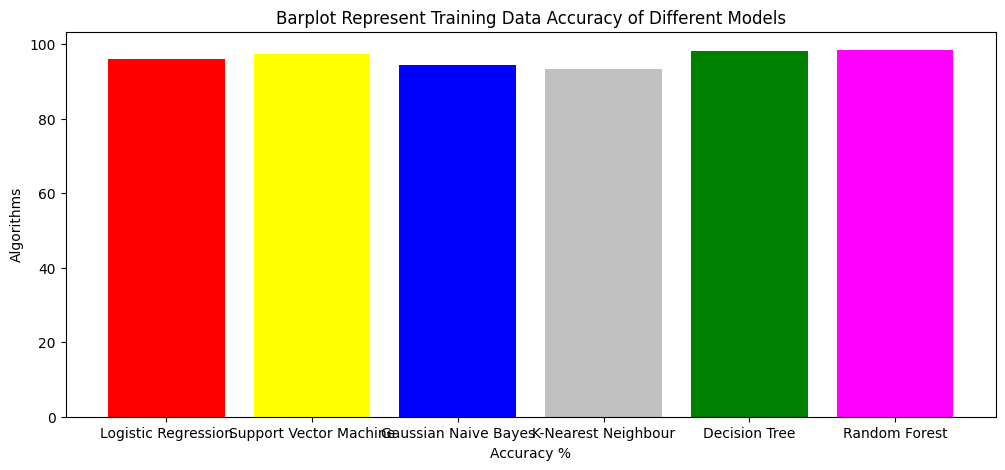

In [22]:
colors = ['red','yellow','blue','silver','green','magenta',]
plt.figure(figsize=(12,5))
plt.title("Barplot Represent Training Data Accuracy of Different Models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Training Data Accuracy'],color = colors)
plt.show()

Applying Ensemble Learning on all Models

In [23]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score


# voting classifier
final_model_1= VotingClassifier(
    estimators=[("LR", model_1), ("SVM", model_2), ("GNB", model_3),("KNN", model_4),("DT", model_5),("RF", model_6)],
    voting="hard",
)

# training
final_model_1.fit(X_train, Y_train)

# prediction
prediction = final_model_1.predict(X_test)



# evaluation
accuracy = round(accuracy_score(Y_test, prediction) * 100, 3)
auc = round(roc_auc_score(Y_test, prediction), 3)

print(f" Accuracy: {accuracy}%")
print(f" AUC score: {auc}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy: 93.86%
 AUC score: 0.927


In [24]:
final_model = VotingClassifier(
    estimators=[("LR", model_1), ("SVM", model_2), ("GNB", model_3),("KNN", model_4),("DT", model_5),("RF", model_6)],
    voting="hard",)

# training
final_model.fit(X_train.values, Y_train)

# prediction



input_data = (18.46,18.52,121.1,1075,0.09874,0.1053,0.1335,0.08795,0.2132,0.06022,0.6997,1.475,4.782,80.6,0.006471,0.01649,0.02806,0.0142,0.0237,0.003755,22.93,27.68,152.2,1603,0.1398,0.2089,0.3157,0.1642,0.3695,0.08579)

# changing the input data to numpyarray
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
#std_data = scaler.transform(input_data_reshaped)
#print(std_data)

prediction = final_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('Tumor is Benign')
else:
  print('Tumor is Malignant')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[1]
Tumor is Malignant


Loading model for integration into our website

In [25]:
import pickle  #This library is uesd to save the model

In [26]:
filename = 'trained_model_breast.sav'
pickle.dump(final_model, open(filename,'wb')) #We are opening the file and writing the file in binary format, wb = writing in binary format

In [27]:
#Loading the saved model
loaded_model = pickle.load(open('trained_model_breast.sav','rb'))# rb = reading in binary format

Just Checking the final_model

In [28]:
input_data = (18.46,18.52,121.1,1075,0.09874,0.1053,0.1335,0.08795,0.2132,0.06022,0.6997,1.475,4.782,80.6,0.006471,0.01649,0.02806,0.0142,0.0237,0.003755,22.93,27.68,152.2,1603,0.1398,0.2089,0.3157,0.1642,0.3695,0.08579)

# changing the input data to numpyarray
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
#std_data = scaler.transform(input_data_reshaped)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('Tumor is Benign')
else:
  print('Tumor is Malignant')

[1]
Tumor is Malignant
